   # Lecture 2: Euler's method.

Suppose that we want to compute a numerical solution to the first-order IVP
\begin{align*}
y'&=f(x,y),\\
y(a) &=y_0
\end{align*}
over the interval $[a,b]$.
Choosing some positive integer $n$, our goal is compute a sequence of points $(x_i,y_i)$ so that if $y$ is the true solution, then
\begin{equation*}
y_i\approx y(x_i)
\end{equation*}
for $i = 0,1,\dots, n$.
We say that there are $n$ **steps**, or equivalently $n+1$ **mesh points** or nodes.
The distance $h_i=x_{i+1}-x_i$ is called the $i$th **step-size**, which may be variable.
For much of this course, however, we will use equally-spaced meshes with step-size $h=(b-a)/n$.

Once the mesh points have been chosen, the most straightforward approach to computing the $y_i$'s is known as Euler's method.
The basic idea of the method is simply an appeal to linearization from calculus.
Namely, if $y$ is the true solution and we assume that we have $y_i=y(x_i)$ exactly, then we have the approximation
\begin{equation}
\begin{split}
y(x_{i+1})&\approx y(x_i) + y'(x_i)(x_{i+1}-x_i)\\
&= y_i + f(x_i,y_i)h
\end{split}
\end{equation}
for small $h$.
**Euler's method** (a.k.a., the **foward Euler method**) recursively defines the $y_i$ by the formula
\begin{equation*}
y_{i+1} = y_i + f(x_i, y_i)h
\end{equation*}
for $0\le i< n$.

## Python implementation.

The `math263` module contains the following Python implementation of the (foward) Euler method.
```python
def feuler(f, a, b, y0, n):
        '''
        numerically solves IVP
                y' = f(x,y), y(a)=y0
        over the interval [a, b] via n steps of the (foward) Euler method 
        '''
        h = (b-a)/n;
        x = np.linspace(a, b, num=n+1);
        y = np.empty(x.size);
        y[0] = y0;
        for i in range(n):
                y[i+1] = y[i] + h * f(x[i], y[i]);

        return (x, y)
```

## Example.

We now show how to use Euler's method to solve the IVP
\begin{align*}
y'&= x^2 - y,\\
y(0)&=3
\end{align*}
over the interval $[0, 2]$.

The true solution to the IVP is $y{\left(x \right)} = x^{2} - 2 x + 2 + e^{- x}$.

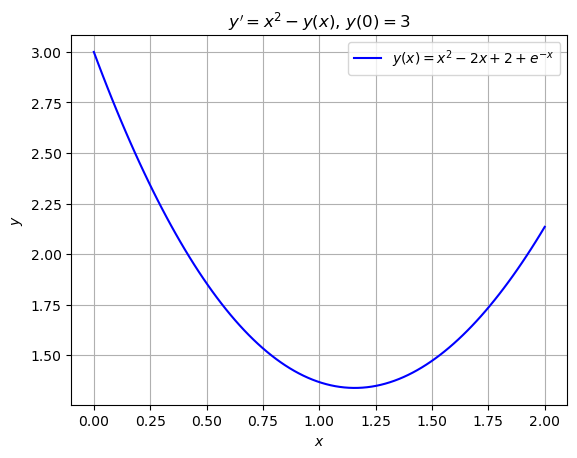

In [1]:
# load modules
import math263
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import display, Markdown

# define IVP parameters
f = lambda x, y: x**2 - y;
a, b = 0, 2;
y0=3;

# solve the IVP symbolically with the sympy library
x = sp.Symbol('x');
y = sp.Function('y');
ode = sp.Eq(y(x).diff(x), f(x,y(x)));
soln=sp.dsolve(ode, y(x), ics={y(a): y0}); 
display(Markdown(f"The true solution to the IVP is ${sp.latex(soln)}$."))
rhs=f(x,y(x));

# convert the symbolic solution to a Python function and plot it with matplotlib.pyplot
sym_y=sp.lambdify(x, soln.rhs, modules=['numpy']); 
hx = 0.01;
xvals = np.linspace(a, b, num=100);
ex1=plt.figure();
plt.plot(xvals, sym_y(xvals), color='b');
plt.title(f"$y' = {sp.latex(rhs)}$, $y({a})={y0}$");
plt.xlabel(r"$x$");
plt.ylabel(r"$y$");
plt.legend([f"${sp.latex(soln)}$"], loc='upper right');
plt.grid(True)

Next we solve the problem numerically with $n=20$ steps of our forward Euler implementation and display the results in a table.  The third column displays the value $y_i$ arising from Euler's method, while the fourth column of the table displays the value $y(x_i)$ of the true solution rounded to 5 decimal places.

In [2]:
# use the forward Euler implementation in the math263 module to numerically solve the IVP with n=20 steps
n = 20;
(x,y) = math263.feuler(f, a, b, y0, n);

# tabulate the results
table = np.transpose(np.stack((x, y, sym_y(x))));
hdrs = ["i", "x_i", "(FEM) y_i", "(true) y(x_i)"];
print(tabulate(table, hdrs, tablefmt='mixed_grid', floatfmt='0.5f', showindex=True))

┍━━━━━┯━━━━━━━━━┯━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━┑
│   i │     x_i │   (FEM) y_i │   (true) y(x_i) │
┝━━━━━┿━━━━━━━━━┿━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━┥
│   0 │ 0.00000 │     3.00000 │         3.00000 │
├─────┼─────────┼─────────────┼─────────────────┤
│   1 │ 0.10000 │     2.70000 │         2.71484 │
├─────┼─────────┼─────────────┼─────────────────┤
│   2 │ 0.20000 │     2.43100 │         2.45873 │
├─────┼─────────┼─────────────┼─────────────────┤
│   3 │ 0.30000 │     2.19190 │         2.23082 │
├─────┼─────────┼─────────────┼─────────────────┤
│   4 │ 0.40000 │     1.98171 │         2.03032 │
├─────┼─────────┼─────────────┼─────────────────┤
│   5 │ 0.50000 │     1.79954 │         1.85653 │
├─────┼─────────┼─────────────┼─────────────────┤
│   6 │ 0.60000 │     1.64459 │         1.70881 │
├─────┼─────────┼─────────────┼─────────────────┤
│   7 │ 0.70000 │     1.51613 │         1.58659 │
├─────┼─────────┼─────────────┼─────────────────┤
│   8 │ 0.80000 │     1.41351 │         1.48933 │


Finally, we plot both the symbolic and the numerical solution together for comparison.

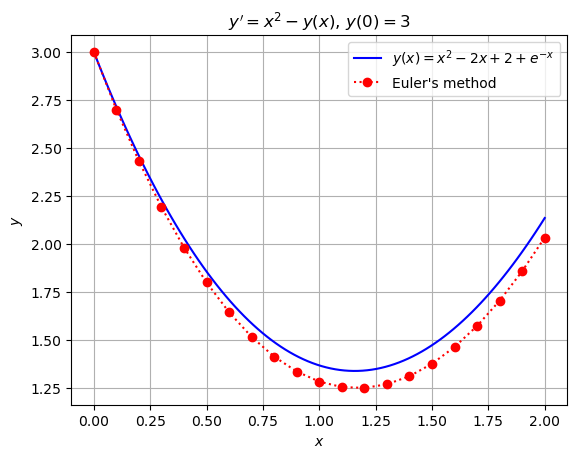

In [3]:
plt.figure(ex1);
plt.plot(x,y,'ro:');
plt.legend([f"${sp.latex(soln)}$","Euler's method"], loc='upper right');
plt.show();

## Exercises:

1. Consider the IVP 
\begin{align*}
y'&=2x-3y+1,\\ y(0)&=1.
\end{align*}
    1. Solve the IVP symbolically and plot the solution over the interval $[0,1]$.
    1. Use Euler's method to solve the IVP numerically over the interval $[0, 1]$ with $n$ steps for $n = 8, 16, 32, 64$. 
    1. Plot the numerical approximations together with the true solution on a single set of axes. Be sure to use labels, legends, and colors so that the different results are distinguishable.
    1. Compute the absolute and relative errors at $x = 1$ for each of your numerical solutions.  Display the results in a table with (of course) appropriate labels/headers. What seems to be happening to the errors each time that we double the number of steps?
1. Consider the IVP 
\begin{align*}
y'&=x^2+y^2,\\
y(0)&=1.
\end{align*}
    1. Solve the IVP symbolically.  
    1. Use Euler's method with step sizes $h = 0.1$ and $h = 0.05$ to obtain a numerical approximation to $y(1/2)$.